# Notebook 02 - Exploratory Data Analysis

## Summary

In this notebook, several distributions and relationships among the features in the Price Test dataset are explored. I also compared the conversion rates and the distributions of premium across the 3 pricing models.

Some main findings:
- Features with high collinearity:
    - ClaimPast5YearCount & ClaimAmount5YearTotal
    - PlansCancelledPast5YearCount & PlansAcceptedPast5YearCount
    - Premium & Fee
- Some degree of class imbalance of target variable 'Acc' in Price Test dataset: 66% vs 34%
- Conversion rates of the 3 models: Price Test (34%), Champion Model (34%), Flat Price (29%)

---

# Data Dictionary

## The Cleaned Raw Dataset, Flat Price Dataset, Champion Model Dataset:

| Column Name                        | Data Type | Description                                                       |
|:--|:--|:--|
| `Acc`                              | integer (binary)   | sale flag (this is the target)                                    |
| `ApplianceCode`                    | integer (nominal)   | the appliance type (encoded)                                      |
| `ClaimAmount5YearTotal`            | float     | sum of total value of claims in the last 5 years                  |
| `ClaimPast5YearCount`              | integer   | number of claims in the last 5 years                              |
| `ClaimsToPlansRatio`               | float     | proportion of claims to the number of current plans               |
| `ClientAccountDesc`                | integer (nominal)   | D+G’s client                                                      |
| `CurrentDate`                      | datetime  | date of the offer                                                 |
| `DNISCode`                         | string (nominal)    | telephone route                                                   |
| `Fee`                              | float     | burning cost premium of this appliance                            |
| `ManufacturerBrandCode`            | integer (nominal)   | the manufacturer of the appliance (encoded)                       |
| `ManufacturerGuaranteePartsMonths` | integer   | the manufacturer guarantee (in months)                            |
| `OfferPostcodeSector`              | string    | appliance’s postcode                                              |
| `PlanLiveCount`                    | integer   | number of plans the customer has                                  |
| `PlansAcceptedPast5YearCount`      | integer   | number of plans the customer had in the last 5 years              |
| `PlansCancelledPast5YearCount`     | integer   | number of plans the customer cancelled in the last 5 years        |
| `Premium`                          | float     | this is the retail price                                          |
| `PrevRTPPriceType`                 | string    | previous RTP price type                                           |
| `PurchasePrice`                    | float     | value paid for the appliance; this is not the premium of the plan |
| `RTPPriceType`                     | string    | RTP price type                                                    |
| `SchemeTypeName`                   | integer (nominal)   | the appliance’s scheme                                            |
| `AgeApplianceDays`                 | integer   | age of appliance in days                                          |
| `OfferRefNum`                      | string (primary key)    | offer reference number                                            |
| `PredConvRate`                     | float     | probability given by the champion model                           |
| `PriceDiff`                        | float     | price difference between base premium and sold premium            |
| `PricingVerDesc`                   | string    | classification of the pricing strategy                            |
| `RelFee`                           | float     | fee to purchase price ratio                                       |

## The Cleaned Price Test Dataset

| Column Name                        | Data Type | Description                                                       |
|:--|:--|:--|
| `Acc`                              | integer (binary)   | sale flag (this is the target)                                    |
| `ApplianceCode`                    | integer (nominal)   | the appliance type (encoded)                                      |
| `ClaimAmount5YearTotal`            | float     | sum of total value of claims in the last 5 years                  |
| `ClaimPast5YearCount`              | integer   | number of claims in the last 5 years                              |
| `ClaimsToPlansRatio`               | float     | proportion of claims to the number of current plans               |
| `ClientAccountDesc`                | integer (nominal)   | D+G’s client                                                      |
| `CurrentDate`                      | datetime  | date of the offer                                                 |
| `DNISCode`                         | string (nominal)    | telephone route                                                   |
| `Fee`                              | float     | burning cost premium of this appliance                            |
| `ManufacturerBrandCode`            | integer (nominal)   | the manufacturer of the appliance (encoded)                       |
| `ManufacturerGuaranteePartsMonths` | integer   | the manufacturer guarantee (in months)                            |
| `OfferPostcodeSector`              | string    | appliance’s postcode                                              |
| `PlanLiveCount`                    | integer   | number of plans the customer has                                  |
| `PlansAcceptedPast5YearCount`      | integer   | number of plans the customer had in the last 5 years              |
| `PlansCancelledPast5YearCount`     | integer   | number of plans the customer cancelled in the last 5 years        |
| `Premium`                          | float     | this is the retail price                                          |
| `PurchasePrice`                    | float     | value paid for the appliance; this is not the premium of the plan |
| `SchemeTypeName`                   | integer (nominal)   | the appliance’s scheme                                            |
| `AgeApplianceDays`                 | integer   | age of appliance in days                                          |
| `OfferRefNum`                      | string (primary key)   | offer reference number                                            |
| `PriceDiff`                        | float     | price difference between base premium and sold premium            |
| `PricingVerDesc`                   | string    | classification of the pricing strategy                            |
| `RelFee`                           | float     | fee to purchase price ratio                                       |

---

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
file_path = '/Users/jonwfyeung/Downloads/domestic-and-general'

In [3]:
df_asis = pd.read_csv(file_path + '/data/df_asis.csv')
df_champ = pd.read_csv(file_path + '/data/df_champ.csv')
df_test_cleaned = pd.read_csv(file_path + '/data/df_test_cleaned.csv')

---

# Exploratory Data Analysis - Numerical Variables

Here we will observe the distributions and relationship among different features in the Price Test dataset.

## Univariate Analysis

<Figure size 640x480 with 0 Axes>

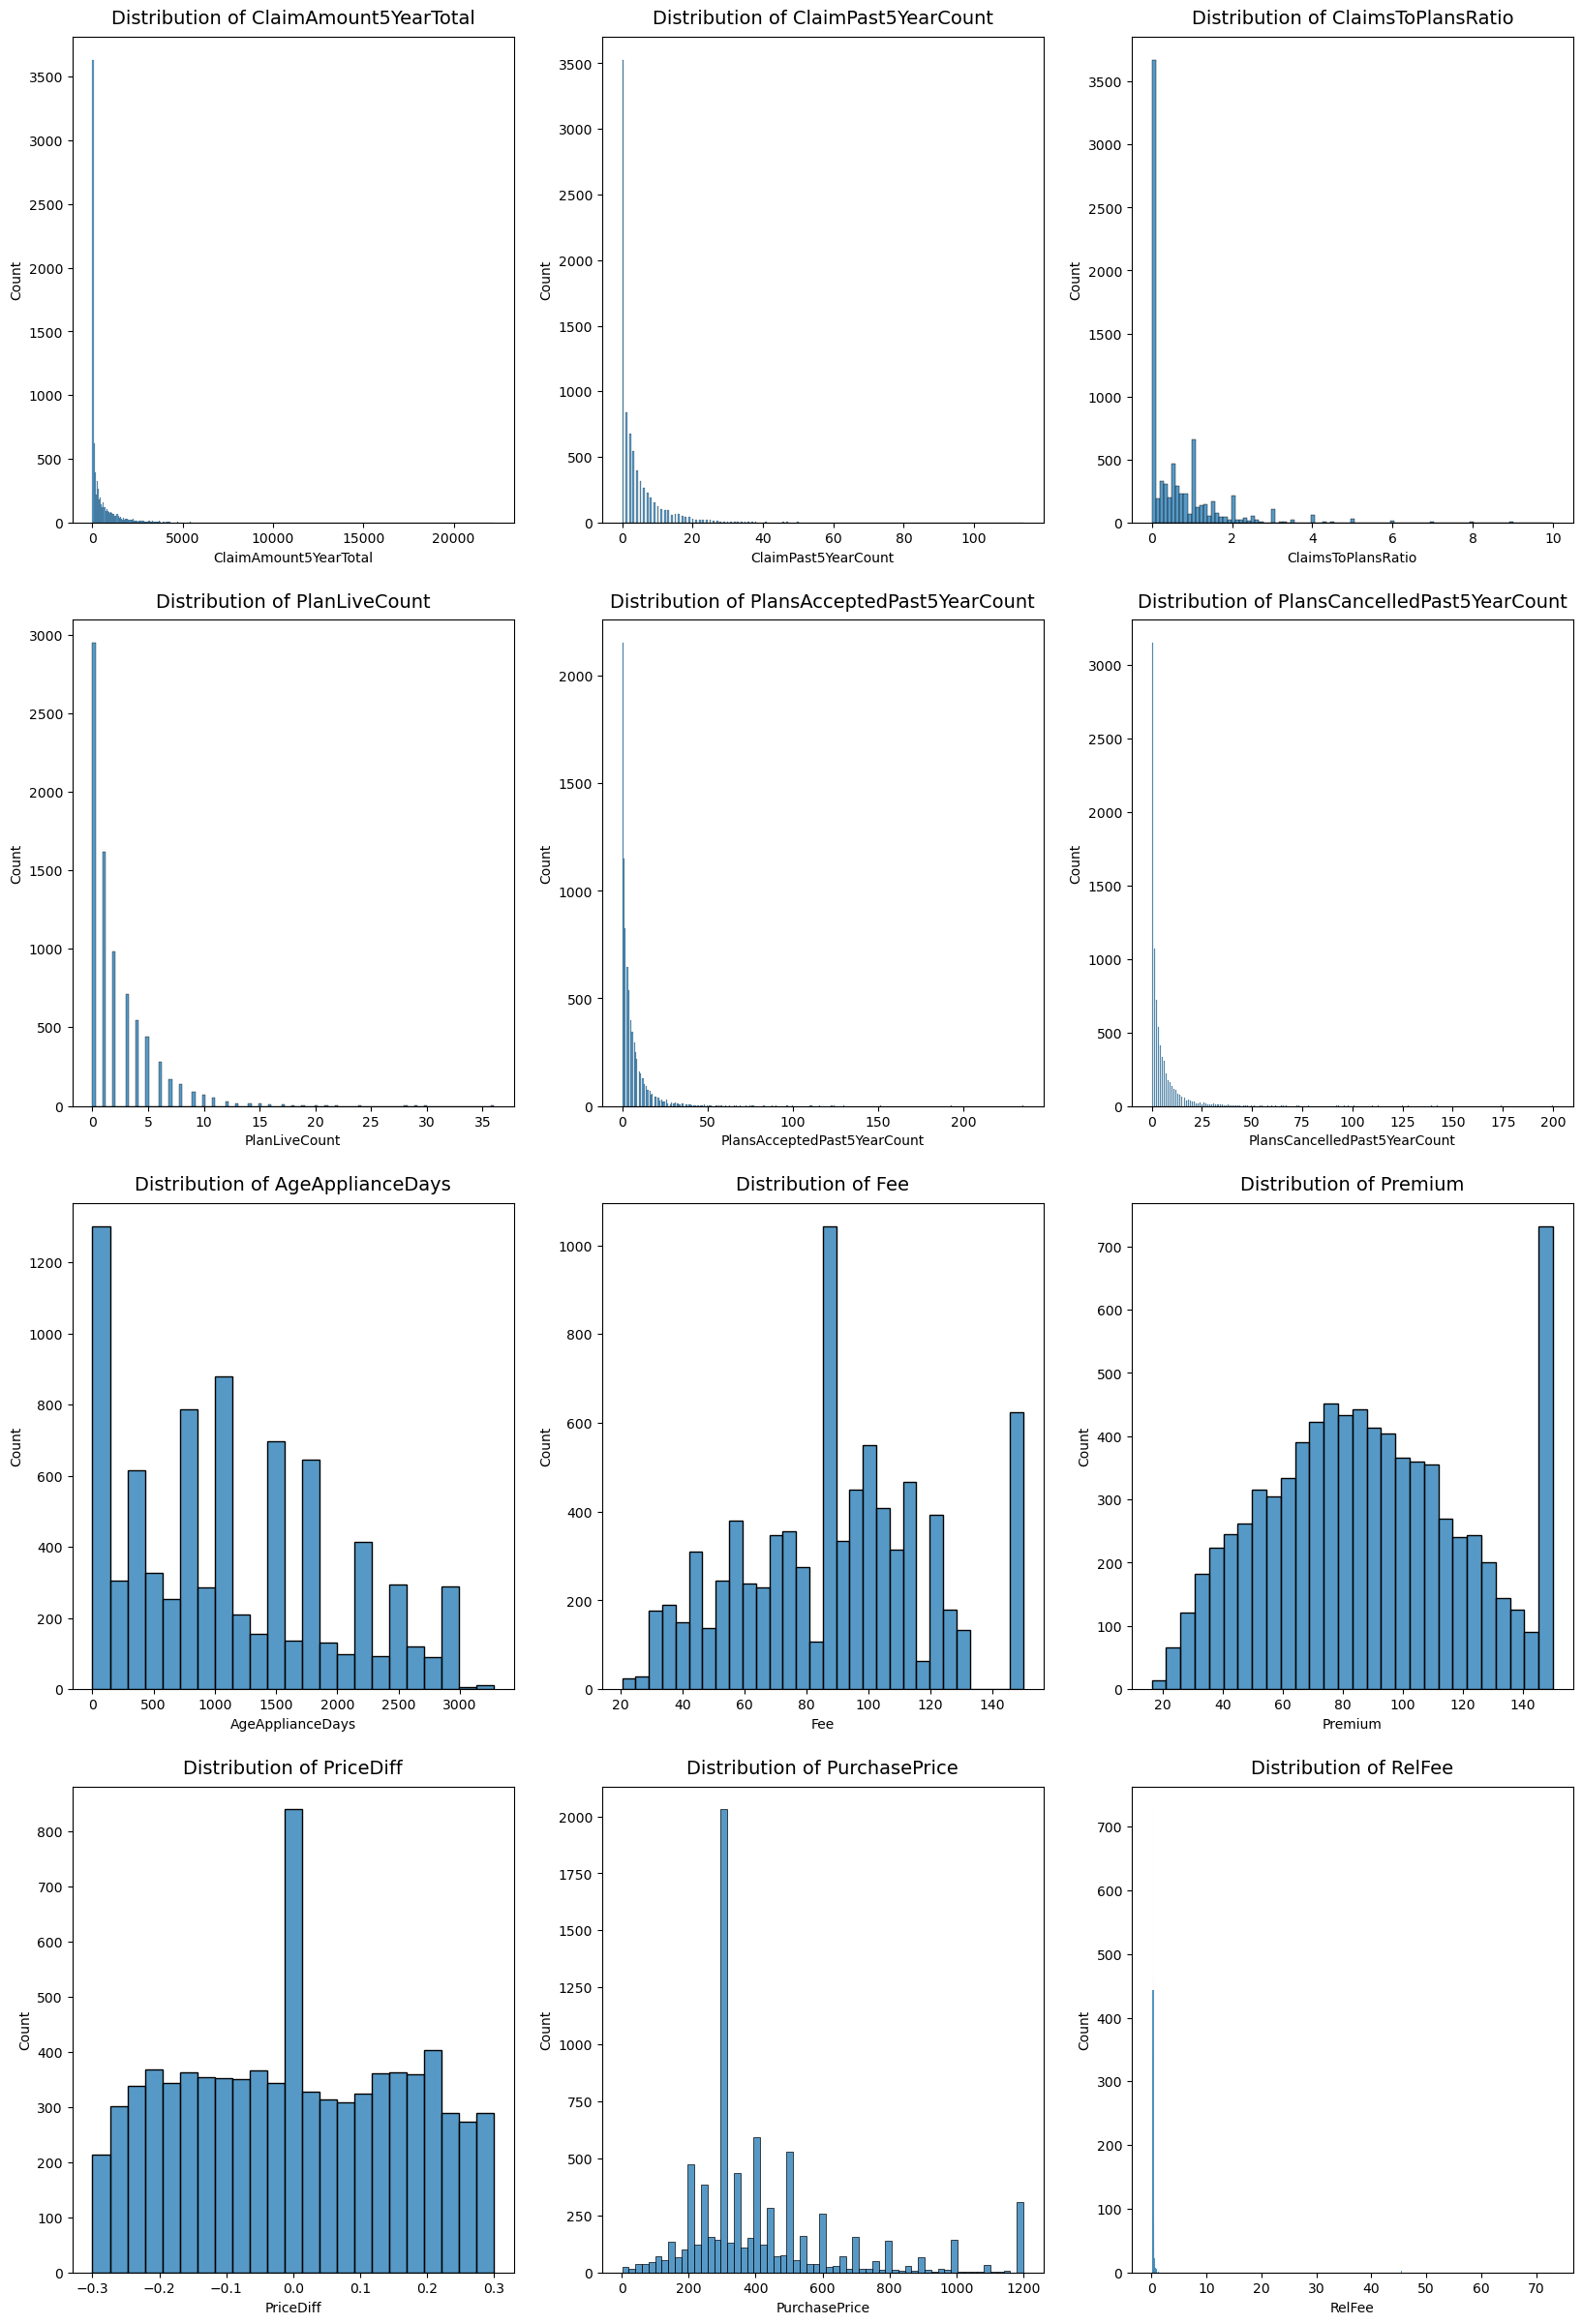

In [4]:
num_cols = ['ClaimAmount5YearTotal',
            'ClaimPast5YearCount',
            'ClaimsToPlansRatio',
            'PlanLiveCount',
            'PlansAcceptedPast5YearCount',
            'PlansCancelledPast5YearCount',
            'AgeApplianceDays',
            'Fee',
            'Premium',
            'PriceDiff',
            'PurchasePrice',
            'RelFee']

plt.figure()
plt.subplots(4, 3, figsize=(20, 30))
for i, num_col in enumerate(num_cols):
    plt.subplot(4, 3, i+1)
    sns.histplot(df_test_cleaned[num_col])
    plt.title(f"Distribution of {num_col}", fontsize=14, y=1.01)
plt.show()

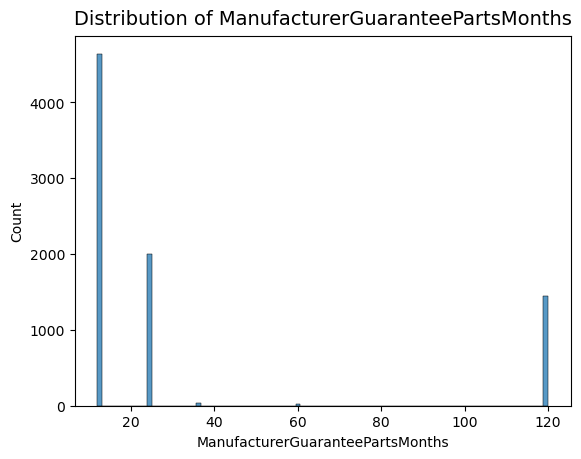

In [5]:
plt.figure()
sns.histplot(df_test_cleaned['ManufacturerGuaranteePartsMonths'])
plt.title(f"Distribution of ManufacturerGuaranteePartsMonths", fontsize=14, y=1.01)
plt.show()

There are very few manufacturer guarantee with coverage duration of 36 months and 60 months. Mostly, the duration is 12 months, 24 months or 120 months.

## Bivariate Analysis

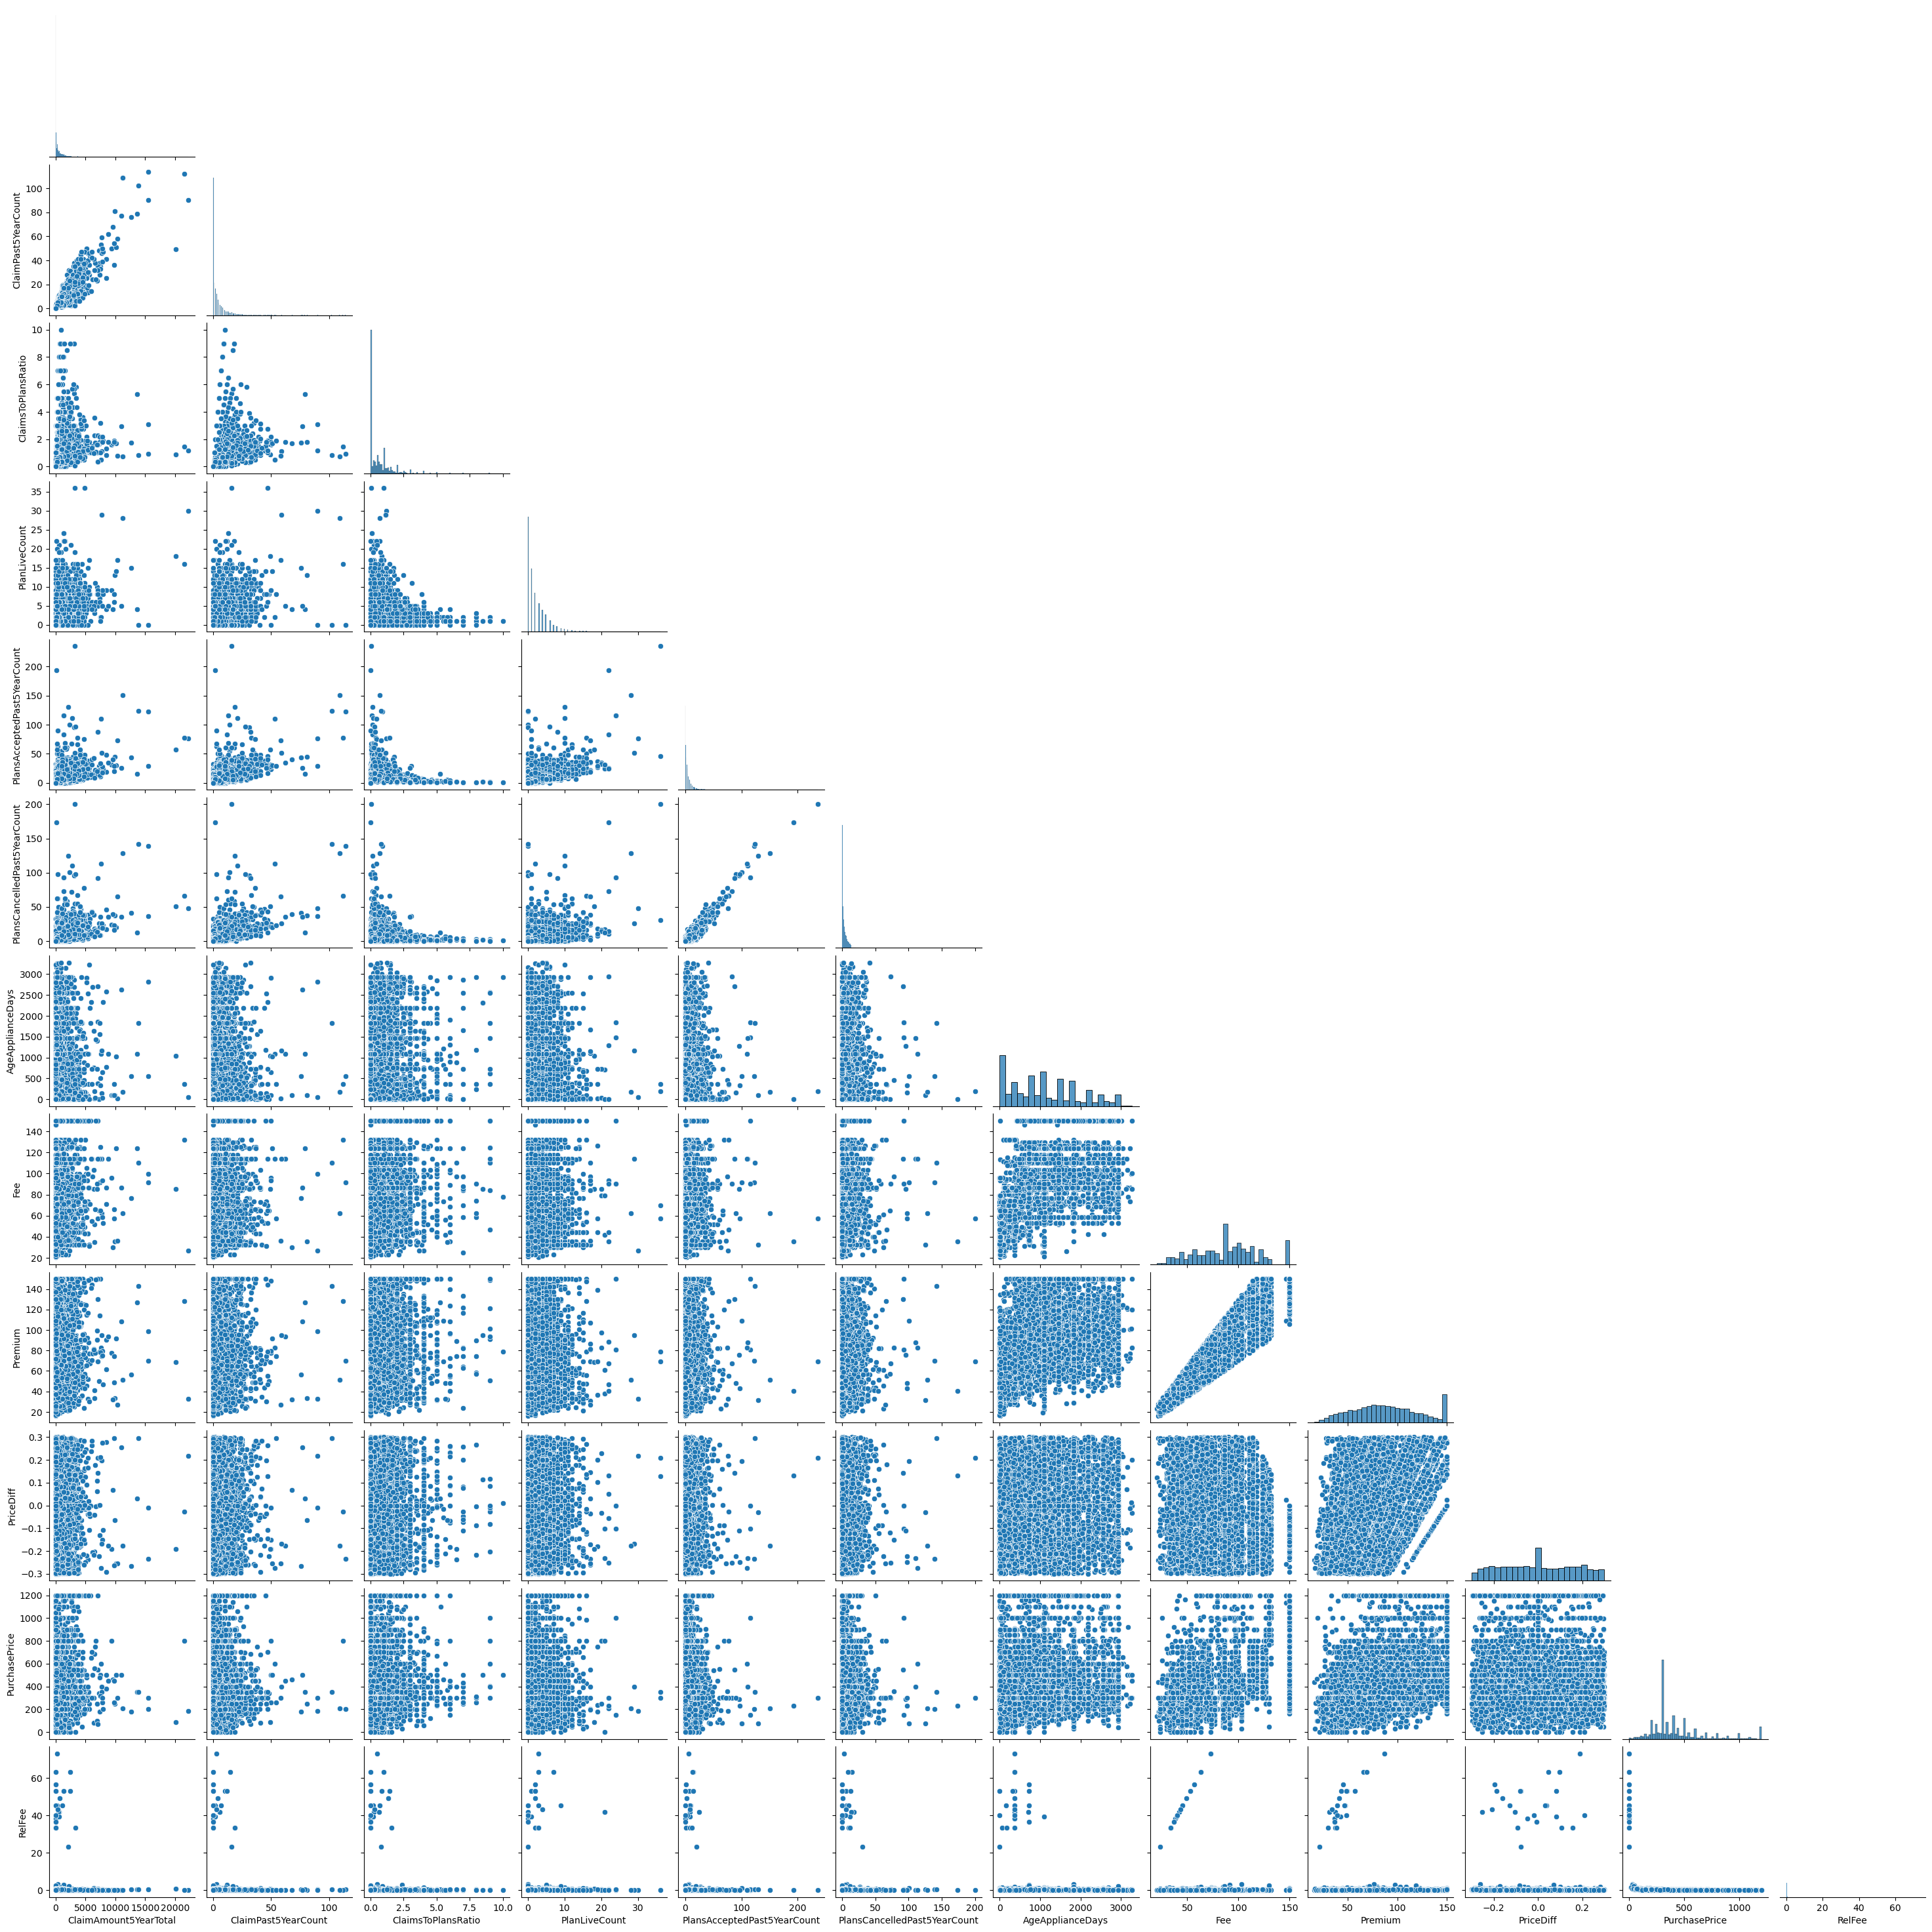

In [6]:
df_corr = df_test_cleaned[num_cols]

sns.pairplot(df_corr, corner=True)
plt.show()

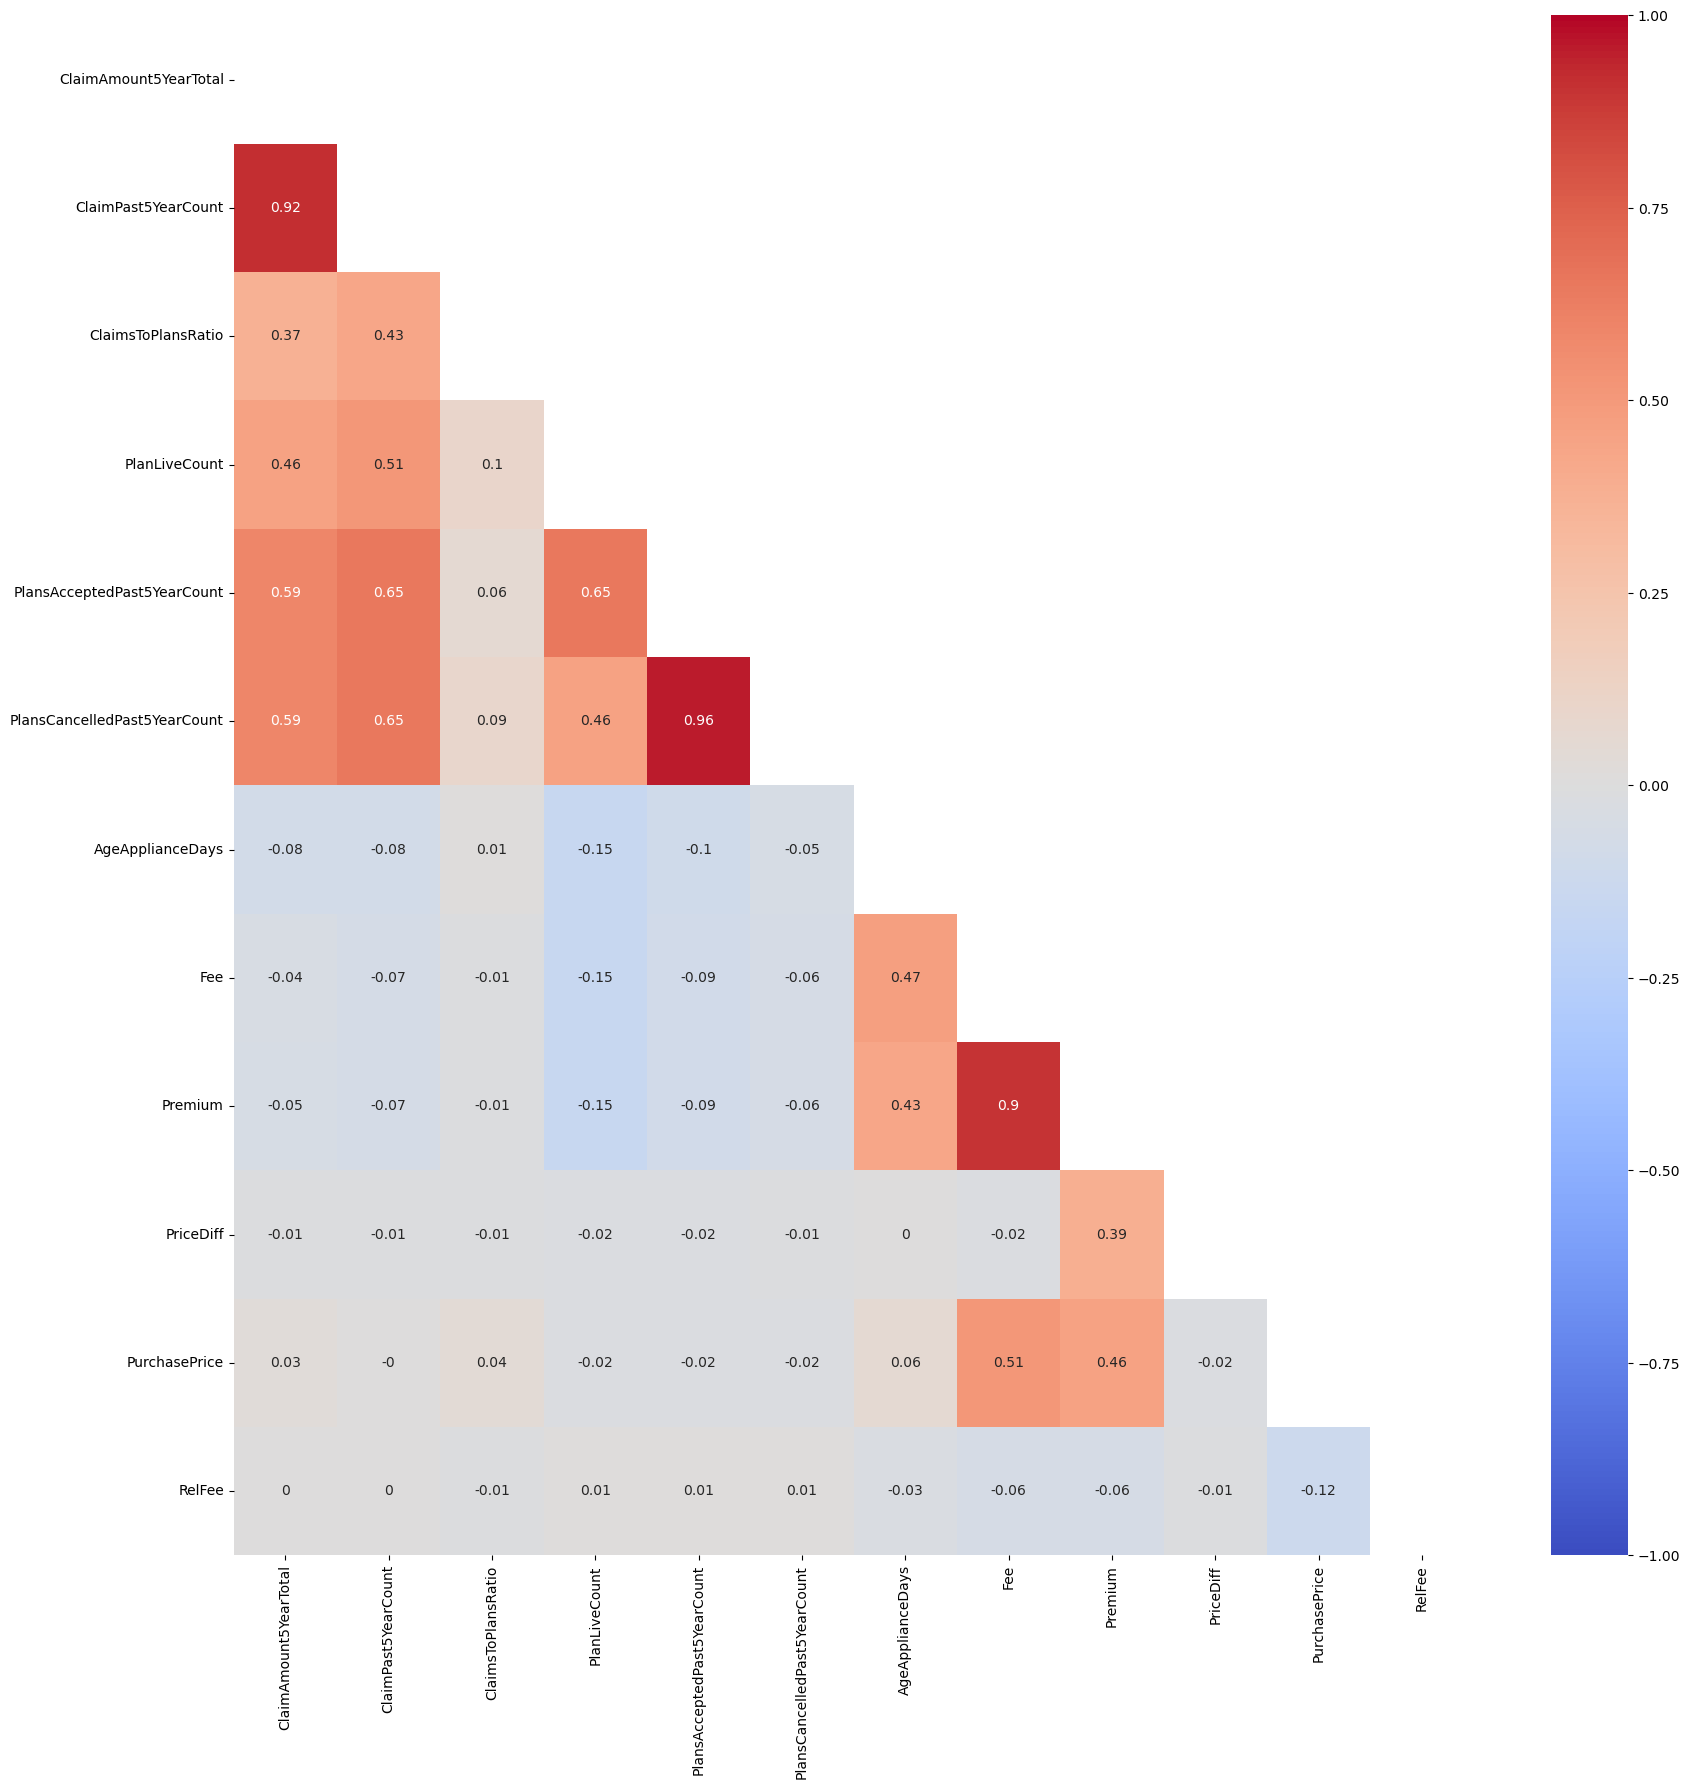

In [7]:
plt.figure(figsize=(20,20))
mask = np.triu(df_corr.corr(numeric_only=True))
sns.heatmap(df_corr.corr(numeric_only=True).round(2),
            annot=True,
            center=0,
            vmax=1,
            vmin=-1,
            mask=mask,
            cmap='coolwarm')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

There are several numerical features having high correlations here.

- ClaimPast5YearCount & ClaimAmount5YearTotal - correlation of 0.92
- PlansCancelledPast5YearCount & PlansAcceptedPast5YearCount - correlation of 0.96
- Premium & Fee - correlation of 0.9

This indicates that we might only use one feature from each pair for modelling as they have high collinearity with other features.

# Exploratory Data Analysis - Categorical Variables

## Univariate Analysis

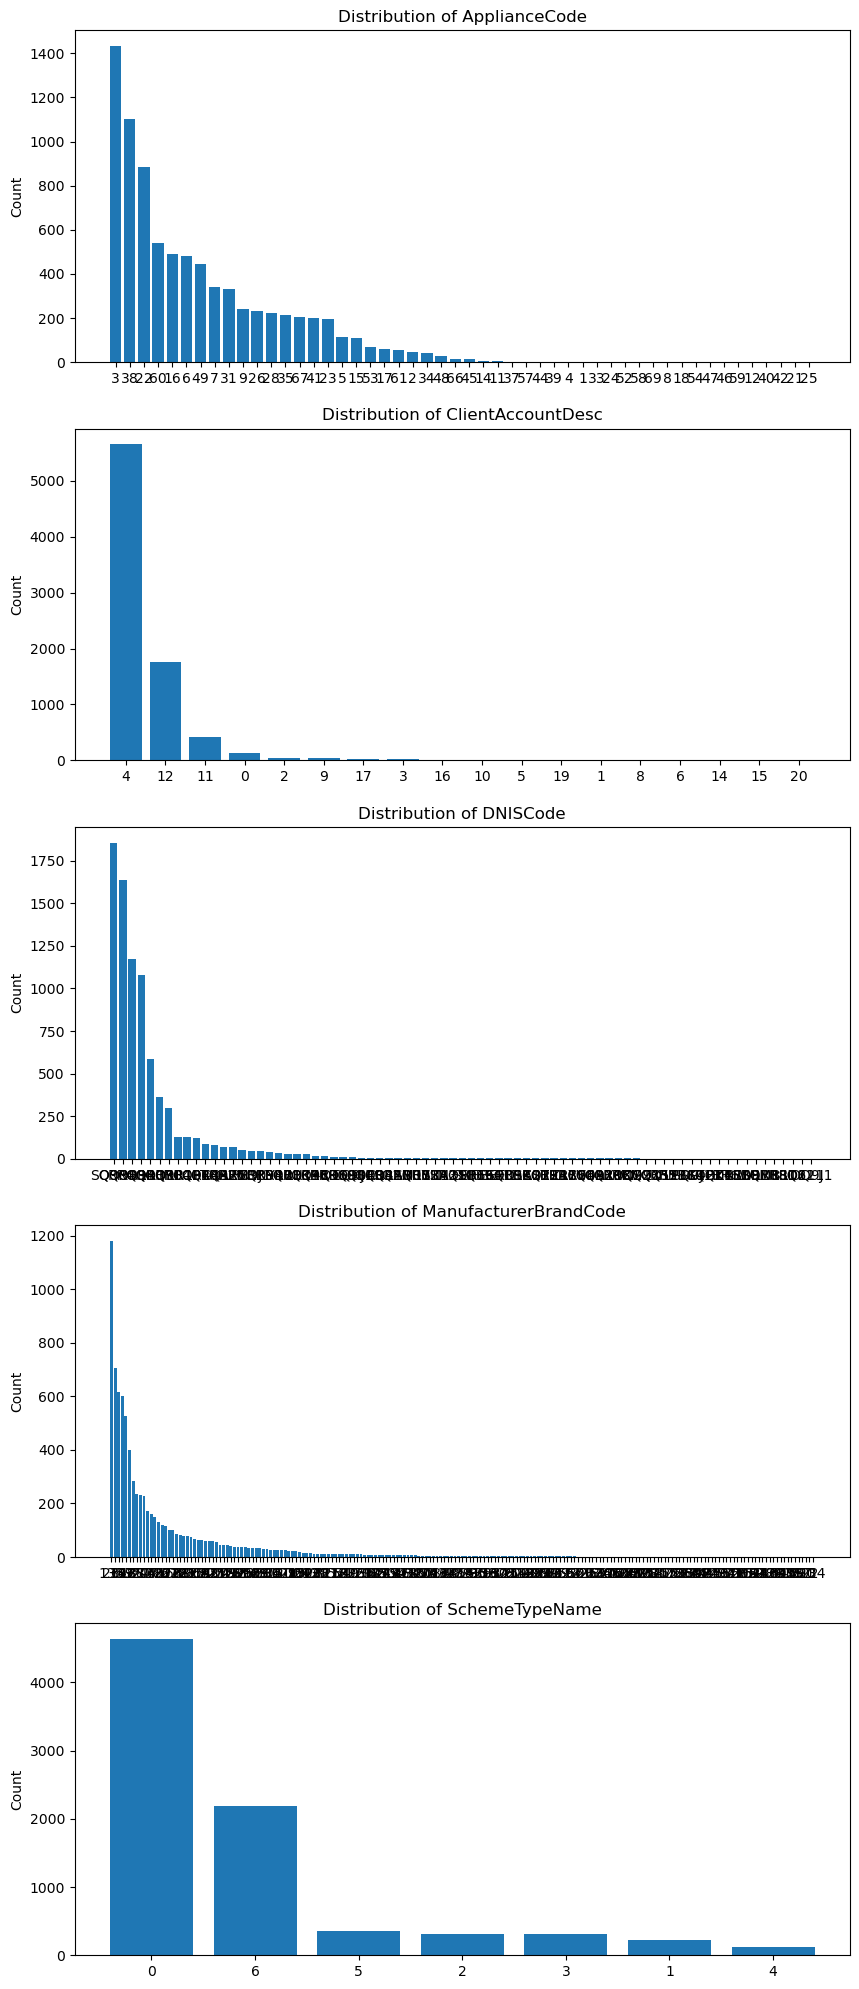

In [16]:
cat_cols = ['ApplianceCode',
            'ClientAccountDesc',
            'DNISCode',
            'ManufacturerBrandCode',
            'SchemeTypeName'
           ]

plt.subplots(5, 1, figsize = (10, 25))
for i, cat_col in enumerate(cat_cols):
    plt.subplot(5, 1, i+1)
    plt.bar(df_test_cleaned[cat_col].astype('string').value_counts().index,
            df_test_cleaned[cat_col].astype('string').value_counts().values)
    plt.title(f"Distribution of {cat_col}")
    plt.ylabel('Count')

The distributions of the above 5 categorical variables all exhibit a long-tailed shape.

## Target Variable

Let's observe the distribution of the target variable - acceptance of the price offer or not.

In [17]:
target = df_test_cleaned['Acc'].value_counts(normalize=True)
target

0    0.659141
1    0.340859
Name: Acc, dtype: float64

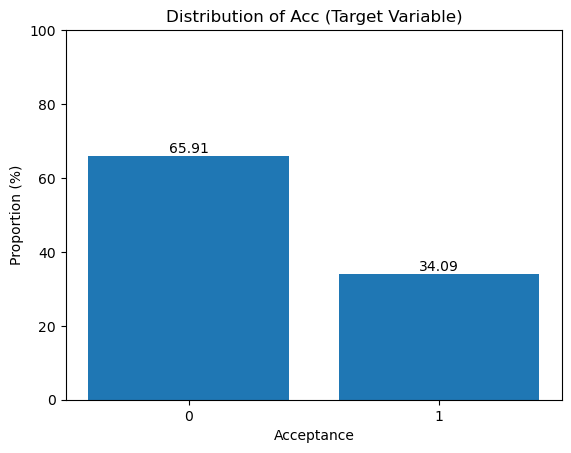

In [18]:
plt.figure()

plt.bar(target.index,
        target.values*100)

plt.xticks([0, 1])
plt.ylim([0, 100])
plt.xlabel("Acceptance")
plt.ylabel("Proportion (%)")
plt.title("Distribution of Acc (Target Variable)")

for i in range(len(target)):
    plt.annotate(f"{target[i]*100:.2f}",
                 xy=(target.index[i], target[i]*100),
                 ha='center',
                 va='bottom'
                )

plt.show()

In the Price Test dataset, there are 34% of acceptance vs 66% of non-acceptance. There is some level of class imbalance here.

## Exploratory Data Analysis - Across The 3 Models

Here we can also compare the conversion rates and the distributions of premium of the 3 pricing models.

In [19]:
df_models = pd.DataFrame(index=['conversion', 'avg_premium'], columns=['asis', 'champ', 'test'])

df_list = [df_asis, df_champ, df_test_cleaned]

for i, df in enumerate(df_list):
    df_models.loc['conversion', df_models.columns[i]] = df['Acc'].mean()
    df_models.loc['avg_premium', df_models.columns[i]] = df['Premium'].mean()
    
df_models

,asis,champ,test
conversion,0.291909,0.339676,0.340859
avg_premium,88.138874,88.527168,88.690263


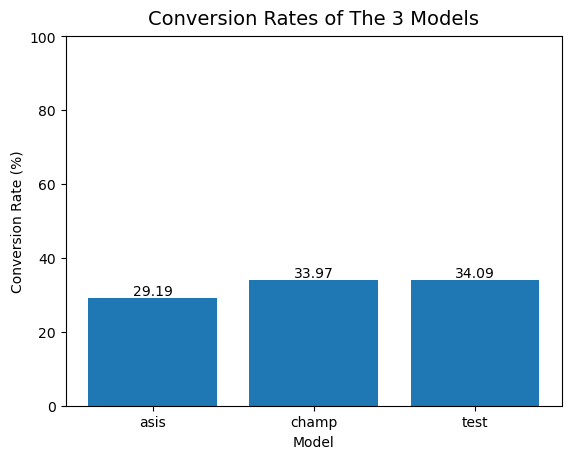

In [20]:
plt.figure()

plt.bar(df_models.iloc[0,:].index,
        df_models.iloc[0,:].values*100)

plt.ylim([0, 100])
plt.xlabel("Model")
plt.ylabel("Conversion Rate (%)")
plt.title("Conversion Rates of The 3 Models", fontsize=14, y=1.01)

for i in range(len(df_models.iloc[0,:])):
    plt.annotate(f"{df_models.iloc[0,i]*100:.2f}",
                 xy= (df_models.iloc[0,:].index[i], df_models.iloc[0,i]*100),
                 ha='center',
                 va='bottom'
                )

plt.show()

Pricing models in descending order of conversion rates: Price Test > Champion Model > Flat Price

They are all in a close range around 30%.

<Figure size 640x480 with 0 Axes>

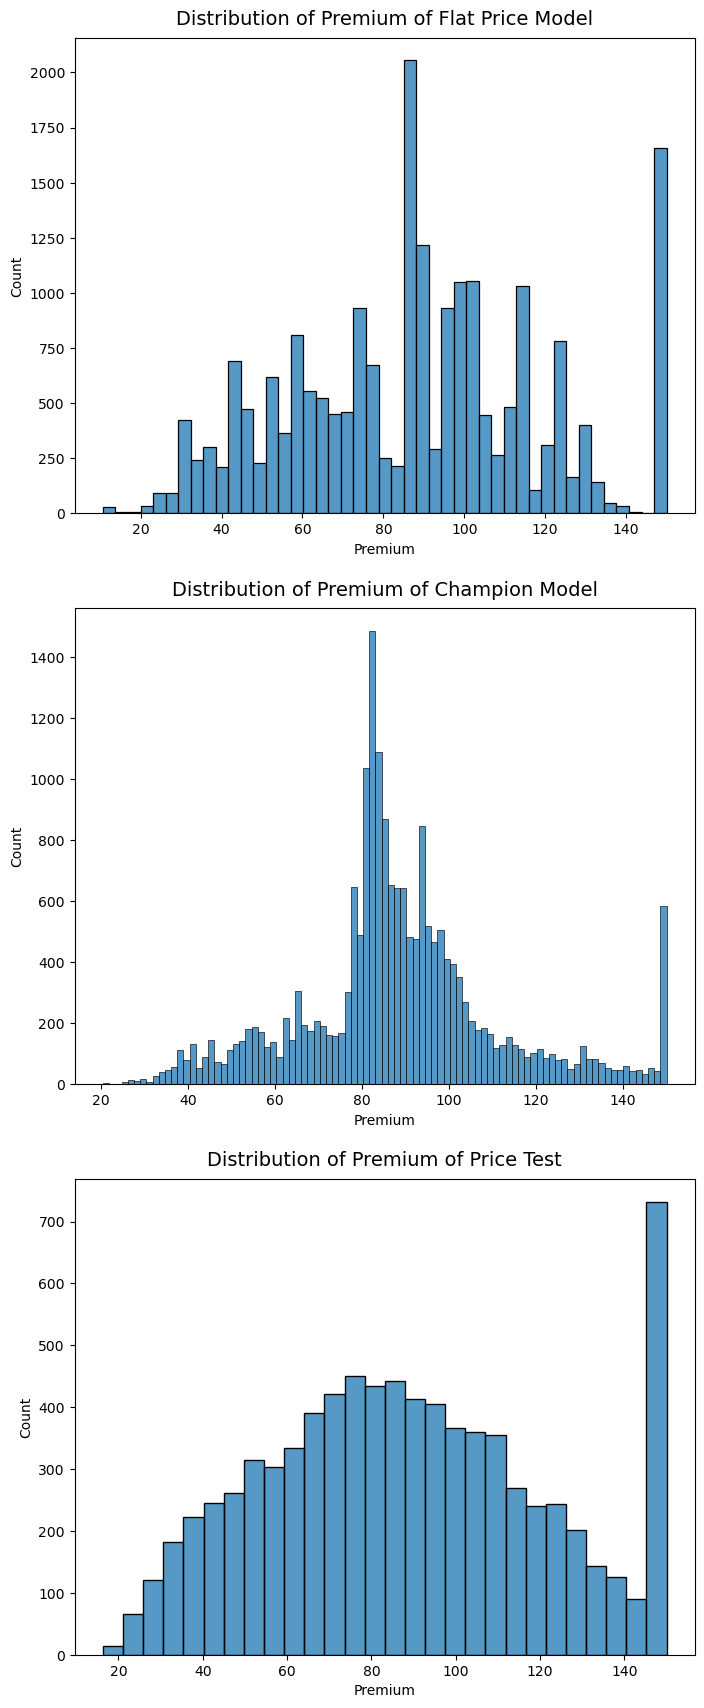

In [21]:
model_list = ['Flat Price Model', 'Champion Model', 'Price Test']

plt.figure()
plt.subplots(3, 1, figsize=(8,21))
for i, df in enumerate(df_list):
    plt.subplot(3, 1, i+1)
    sns.histplot(df['Premium'])
    plt.title(f"Distribution of Premium of {model_list[i]}", fontsize=14, y=1.01)
plt.show()

It is common to the 3 pricing models that premium between 80 to 100 has a higher frequency and there is an additional group of premium at 150 added to every pricing model.

As given, the premium of Price Test strategy is randomly assigned.

We can see from the graph that the distribution of premium of Price Test strategy is roughly bell-shaped and symmetric.